In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split

# Function to split the data into train and test
def split_data(df):
    X = df.drop(columns=['Fall'])
    y = df['Fall'] # Target class

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return x_train, x_test, y_train, y_test

In [13]:
from hmmlearn import hmm

# Function to train HMM model
def train_hmm(x_train):
    # Convert the dataframe to numpy arrays
    X_train_np = x_train.to_numpy()

    # Define the HMM model
    hmm_model = hmm.GaussianHMM(n_components=2, random_state=6, n_iter=2, covariance_type="spherical")

    # Train the HMM model
    hmm_model.fit(X_train_np)
    
    return hmm_model

# Function to predict using HMM model
def predict_with_hmm(hmm_model, x_test):
    predict = hmm_model.predict(x_test)
    return predict

In [14]:
df_all_sensors = pd.read_csv('all_sensors.csv')
df_all_sensors

,SubjectID,Device,ActivityID,TrialNo,Fall,Mean Acc X,Std Acc X,Rng Acc X,Mean Acc Y,Std Acc Y,...,Rng Mag Y,Mean Mag Z,Std Mag Z,Rng Mag Z,Mean Bar X,Std Bar X,Rng Bar X,Mean Bar Y,Std Bar Y,Rng Bar Y
0,1,Neck,13,1,No Fall,0.965650,0.056048,0.466528,0.965650,0.056048,...,0.49392,0.246316,0.125829,0.49392,12.159584,0.000470,0.002822,0.285455,0.000506,0.001763
1,1,Neck,13,2,No Fall,0.966358,0.032715,0.320616,0.966358,0.032715,...,0.22750,0.298555,0.040902,0.22750,12.158870,0.000530,0.003189,0.290078,0.000433,0.001487
2,1,Neck,13,3,No Fall,0.972429,0.061986,0.609756,0.972429,0.061986,...,0.34622,0.065271,0.113632,0.34622,12.157660,0.001103,0.005183,0.294540,0.000391,0.001313
3,1,Neck,13,4,No Fall,0.967180,0.040855,0.436028,0.967180,0.040855,...,0.27412,-0.004766,0.043955,0.27412,12.157788,0.000535,0.003058,0.297370,0.000363,0.001298
4,1,Neck,13,5,No Fall,0.959253,0.058024,0.545584,0.959253,0.058024,...,0.50876,0.197626,0.113787,0.50876,12.159032,0.000739,0.004026,0.306796,0.000533,0.001818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,15,Waist,131,2,Fall,0.421164,0.482082,3.109536,0.421164,0.482082,...,0.92008,0.584274,0.116918,0.92008,12.141950,0.000547,0.003114,0.272869,0.000156,0.000755
6601,15,Waist,132,1,Fall,0.477437,0.525878,12.972016,0.477437,0.525878,...,0.64218,0.357015,0.124277,0.64218,12.134237,0.000696,0.003566,0.289796,0.000474,0.001785
6602,15,Waist,134,2,Fall,0.516297,0.416558,5.058364,0.516297,0.416558,...,0.78834,0.370667,0.136420,0.78834,12.134573,0.000924,0.006323,0.292208,0.000887,0.003299
6603,15,Waist,135,1,Fall,0.838070,0.210071,4.985652,0.838070,0.210071,...,0.64596,0.245743,0.167907,0.64596,12.134479,0.000761,0.003542,0.293881,0.000566,0.001970


In [18]:
df_all_sensors.drop(columns=['SubjectID', 'Device',	'ActivityID', 'TrialNo'], inplace=True)
df_all_sensors['Fall'] = df_all_sensors['Fall'].replace({'No Fall': 1, 'Fall': 0})
df_all_sensors

,Fall,Mean Acc X,Std Acc X,Rng Acc X,Mean Acc Y,Std Acc Y,Rng Acc Y,Mean Acc Z,Std Acc Z,Rng Acc Z,...,Rng Mag Y,Mean Mag Z,Std Mag Z,Rng Mag Z,Mean Bar X,Std Bar X,Rng Bar X,Mean Bar Y,Std Bar Y,Rng Bar Y
0,1,0.965650,0.056048,0.466528,0.965650,0.056048,0.466528,0.965650,0.056048,0.466528,...,0.49392,0.246316,0.125829,0.49392,12.159584,0.000470,0.002822,0.285455,0.000506,0.001763
1,1,0.966358,0.032715,0.320616,0.966358,0.032715,0.320616,0.966358,0.032715,0.320616,...,0.22750,0.298555,0.040902,0.22750,12.158870,0.000530,0.003189,0.290078,0.000433,0.001487
2,1,0.972429,0.061986,0.609756,0.972429,0.061986,0.609756,0.972429,0.061986,0.609756,...,0.34622,0.065271,0.113632,0.34622,12.157660,0.001103,0.005183,0.294540,0.000391,0.001313
3,1,0.967180,0.040855,0.436028,0.967180,0.040855,0.436028,0.967180,0.040855,0.436028,...,0.27412,-0.004766,0.043955,0.27412,12.157788,0.000535,0.003058,0.297370,0.000363,0.001298
4,1,0.959253,0.058024,0.545584,0.959253,0.058024,0.545584,0.959253,0.058024,0.545584,...,0.50876,0.197626,0.113787,0.50876,12.159032,0.000739,0.004026,0.306796,0.000533,0.001818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,0,0.421164,0.482082,3.109536,0.421164,0.482082,3.109536,0.421164,0.482082,3.109536,...,0.92008,0.584274,0.116918,0.92008,12.141950,0.000547,0.003114,0.272869,0.000156,0.000755
6601,0,0.477437,0.525878,12.972016,0.477437,0.525878,12.972016,0.477437,0.525878,12.972016,...,0.64218,0.357015,0.124277,0.64218,12.134237,0.000696,0.003566,0.289796,0.000474,0.001785
6602,0,0.516297,0.416558,5.058364,0.516297,0.416558,5.058364,0.516297,0.416558,5.058364,...,0.78834,0.370667,0.136420,0.78834,12.134573,0.000924,0.006323,0.292208,0.000887,0.003299
6603,0,0.838070,0.210071,4.985652,0.838070,0.210071,4.985652,0.838070,0.210071,4.985652,...,0.64596,0.245743,0.167907,0.64596,12.134479,0.000761,0.003542,0.293881,0.000566,0.001970


In [19]:
x_train, x_test, y_train, y_test = split_data(df_all_sensors)
trained_hmm_model = train_hmm(x_train)
predictions = predict_with_hmm(trained_hmm_model, x_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7948523845571537

In [22]:
cm = confusion_matrix(y_test, predictions)
cm

array([[225, 104],
       [167, 825]], dtype=int64)

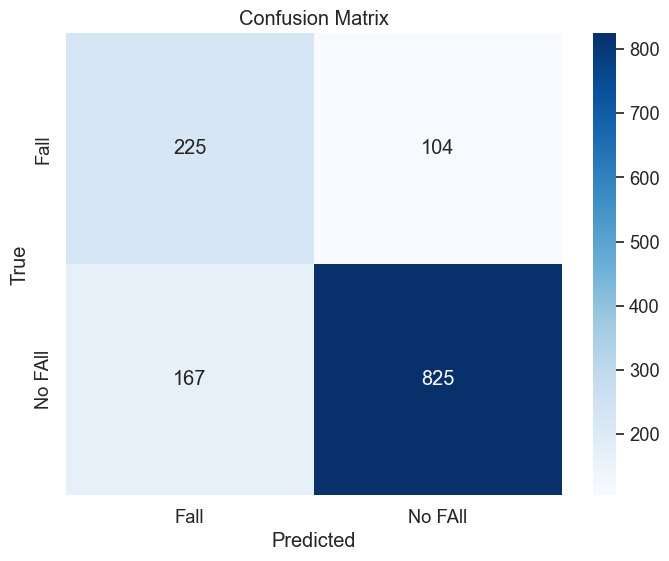

In [25]:
class_names = ['Fall', 'No FAll']

# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
def calculate_metrics(cm):
    # Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Calculate sensitivity (recall)
    sensitivity = TP / (TP + FN)

    # Calculate specificity
    specificity = TN / (TN + FP)

    # Calculate precision
    precision = TP / (TP + FP)

    # Calculate recall
    recall = sensitivity

    # Calculate F1-score
    f1_score = 2 * (precision * recall) / (precision + recall)

    return sensitivity, specificity, precision, recall, f1_score

# Example confusion matrix (replace it with your actual confusion matrix)
cm = np.array([[50, 5], [10, 35]])

sensitivity, specificity, precision, recall, f1_score = calculate_metrics(cm)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Sensitivity", "Specificity", "Precision", "Recall", "F1-score"],
    "Value": [sensitivity, specificity, precision, recall, f1_score]
})

metrics_df


,Metric,Value
0,Sensitivity,0.777778
1,Specificity,0.909091
2,Precision,0.875000
3,Recall,0.777778
4,F1-score,0.823529


In [30]:
from sklearn.metrics import classification_report

report_hmm = classification_report(y_test, predictions, zero_division=0)

print(report_hmm)

              precision    recall  f1-score   support

           0       0.57      0.68      0.62       329
           1       0.89      0.83      0.86       992

    accuracy                           0.79      1321
   macro avg       0.73      0.76      0.74      1321
weighted avg       0.81      0.79      0.80      1321

